In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import scipy
import numpy as np

import skimage as image_tool
from skimage import measure
from skimage.filters import threshold_otsu

## Γειτνίαση και labeling σε binary εικόνα

Text(0.5, 1.0, 'Binary_Image')

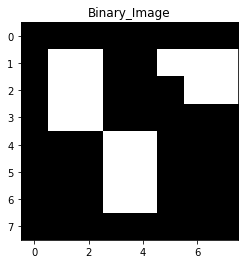

In [2]:
Image_Binary=[[0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 0, 0, 1, 1, 1],
              [0, 1, 1, 0, 0, 0, 1, 1],[0, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],
              [0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]]

Image_Binary=np.asarray(Image_Binary)

plt.figure(1)
plt.imshow(Image_Binary,cmap='gray')
plt.title('Binary_Image')

### 8 Neighbors

<ipython-input-18-b5064c0d4062>:1: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  [Labeled_image_8,num_of_neighbors_8] = measure.label(Image_Binary,  neighbors=8,background=False,return_num=True) #Get labeled image on 8 neighbors


Text(0.5, 1.0, 'Labelled_Pseudo_grayscale Image')

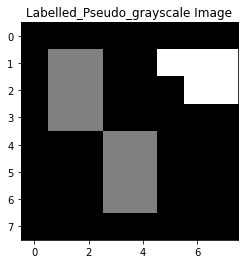

In [18]:
[Labeled_image_8,num_of_neighbors_8] = measure.label(Image_Binary,  neighbors=8,background=False,return_num=True) #Get labeled image on 8 neighbors

plt.figure(2)
plt.imshow(Labeled_image_8,cmap="gray")
plt.title('Labelled_Pseudo_grayscale Image')


### 4 Neighbors

<ipython-input-19-6e78fde607f6>:1: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  [Labeled_image_4,num_of_neighbors_4] = measure.label(Image_Binary,  neighbors=4,background=False,return_num=True) #Get labeeled image on 8 neighbors


Text(0.5, 1.0, 'Labelled_Pseudo_grayscale Image_2')

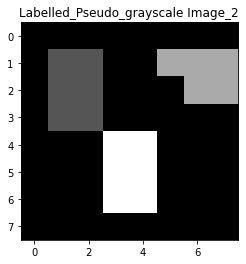

In [19]:
[Labeled_image_4,num_of_neighbors_4] = measure.label(Image_Binary,  neighbors=4,background=False,return_num=True) #Get labeeled image on 8 neighbors

plt.figure(3)
plt.imshow(Labeled_image_4,cmap="gray")
plt.title('Labelled_Pseudo_grayscale Image_2')

### Σύνοψη γειτνίασης

Text(0.5, 1.0, '4 Neighbors Image')

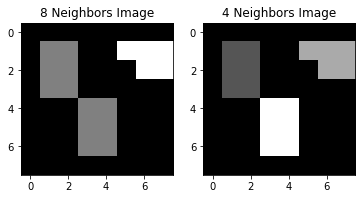

In [20]:
f = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(Labeled_image_8,cmap="gray")
plt.title('8 Neighbors Image')

plt.subplot(1, 2, 2)
plt.imshow(Labeled_image_4,cmap="gray")
plt.title('4 Neighbors Image')

## Γειτνίαση και labeling σε grayscale εικόνα

In [21]:
grayscale_image = mpimg.imread('coins.png')
grayscale_image

array([[0.19215687, 0.19607843, 0.1882353 , ..., 0.22745098, 0.21568628,
        0.21568628],
       [0.18431373, 0.18431373, 0.19215687, ..., 0.21960784, 0.22352941,
        0.21568628],
       [0.1882353 , 0.1882353 , 0.19215687, ..., 0.22352941, 0.21960784,
        0.22352941],
       ...,
       [0.2784314 , 0.27450982, 0.27450982, ..., 0.27450982, 0.27058825,
        0.27450982],
       [0.27058825, 0.2784314 , 0.2784314 , ..., 0.27450982, 0.28235295,
        0.2784314 ],
       [0.27058825, 0.26666668, 0.27058825, ..., 0.2784314 , 0.28235295,
        0.2784314 ]], dtype=float32)

Text(0.5, 1.0, 'Original image-Coins')

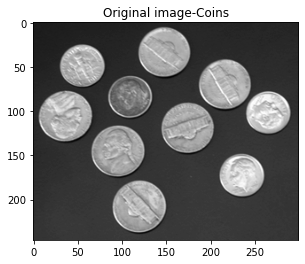

In [22]:
plt.figure(1)
plt.imshow(grayscale_image,cmap="gray")
plt.title('Original image-Coins')

### Κανονικοποίηση εικόνας (0 έως 255)

In [23]:
grayscale_image = (grayscale_image * 255).round().astype(np.uint8)
grayscale_image

array([[49, 50, 48, ..., 58, 55, 55],
       [47, 47, 49, ..., 56, 57, 55],
       [48, 48, 49, ..., 57, 56, 57],
       ...,
       [71, 70, 70, ..., 70, 69, 70],
       [69, 71, 71, ..., 70, 72, 71],
       [69, 68, 69, ..., 71, 72, 71]], dtype=uint8)

Text(0.5, 1.0, 'Original image-Coins')

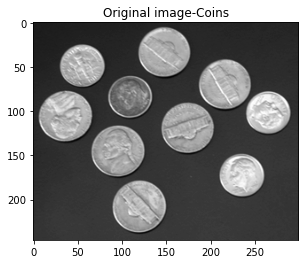

In [24]:
plt.figure(1)
plt.imshow(grayscale_image,cmap="gray")
plt.title('Original image-Coins')

### Μετατροπή grayscale image σε binary

Text(0.5, 1.0, 'Binary image with holes')

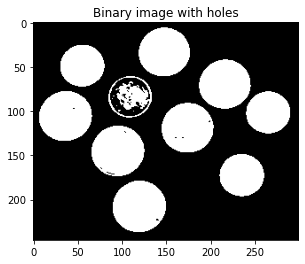

In [25]:
thresh = threshold_otsu(grayscale_image)
Binary_image = grayscale_image > thresh

Binary_image=Binary_image.astype(int)

plt.figure(2)
plt.imshow(Binary_image,cmap='gray')
plt.title('Binary image with holes')

In [26]:
Binary_image=scipy.ndimage.morphology.binary_fill_holes(Binary_image)#Fill image's holes
Binary_image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
Binary_image=Binary_image.astype(int)
Binary_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.0, 'Binary image WITHOUT holes')

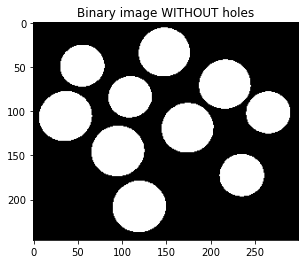

In [28]:
plt.figure(3)
plt.imshow(Binary_image,cmap='gray')
plt.title('Binary image WITHOUT holes')

<ipython-input-29-0f2d004b55f2>:1: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  [Labeled_image,num_of_neighbors] = measure.label(Binary_image,  neighbors=4,background=False,return_num=True) #Get labeeled image on 4 neighbors


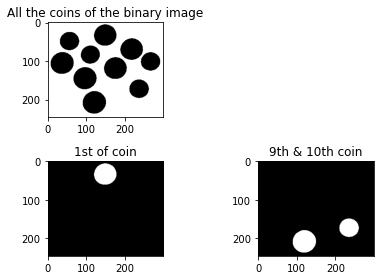

In [29]:
[Labeled_image,num_of_neighbors] = measure.label(Binary_image,  neighbors=4,background=False,return_num=True) #Get labeeled image on 4 neighbors

fig = plt.figure(4)

plt.subplot(2,2,1)
plt.imshow(Labeled_image==0, cmap='gray')
plt.title('All the coins of the binary image')

plt.subplot(2,2,3)
plt.imshow(Labeled_image==1, cmap='gray')
plt.title('1st of coin')

plt.subplot(2,2,4)
plt.imshow(Labeled_image>=9, cmap='gray')
plt.title('9th & 10th coin')

fig.tight_layout()

In [30]:
Labeled_image == 10

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Text(0.5, 1.0, '8th coin of binary image')

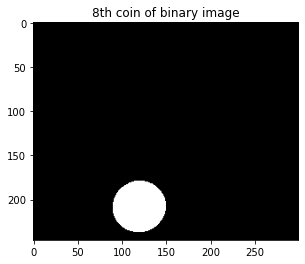

In [31]:
plt.figure(4)
plt.imshow(Labeled_image==10,cmap='gray')
plt.title('8th coin of binary image')

<ipython-input-32-63280406521b>:1: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  [Labeled_image,num_of_labels] = measure.label(Binary_image,  neighbors=4, background=False,return_num=True) #Get labeled image on 4 neighbors


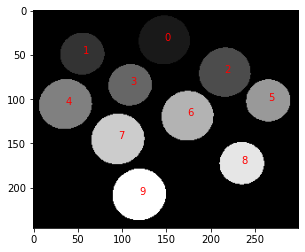

In [32]:
[Labeled_image,num_of_labels] = measure.label(Binary_image,  neighbors=4, background=False,return_num=True) #Get labeled image on 4 neighbors

Overall_connected_list = image_tool.measure.regionprops(Labeled_image) #Find the connected pixels

plt.figure(5)   
plt.imshow(Labeled_image, cmap='gray')

for i in range(num_of_labels):
    plt.annotate(i, 
                 xy = (Overall_connected_list[i].centroid[1], Overall_connected_list[i].centroid[0]),
                 color = 'red')


## Άσκηση
- Να διαβάσετε την εικόνα rice.png και να υπολογίσετε την δυαδική εικόνα με τους κόκους ρυζιού. 
- Βρείτε την 4 και 8 γειτνίαση και εμφανίστε τις σε ένα figure με 2 subplots.
- Αποθηκεύστε το figure.
- Βρείτε τα connected pixels της εικόνας με γειτνίαση 4.

**Ανεβάστε στο eclass το αρχείο του jupyter notebook μαζί με το figure, σε ένα zip αρχείο με όνομα cv_lab03_AM.zip (όπου ΑΜ ο αριθμός μητρώου).**